In [1]:
from qiskit.circuit import QuantumCircuit,ClassicalRegister, QuantumRegister
from qiskit.quantum_info import random_statevector, Statevector

from qiskit.circuit.library.data_preparation import Initialize
from qiskit import transpile
from qiskit_aer import StatevectorSimulator
from qiskit.result import marginal_counts
from qiskit.visualization import plot_histogram, plot_bloch_multivector

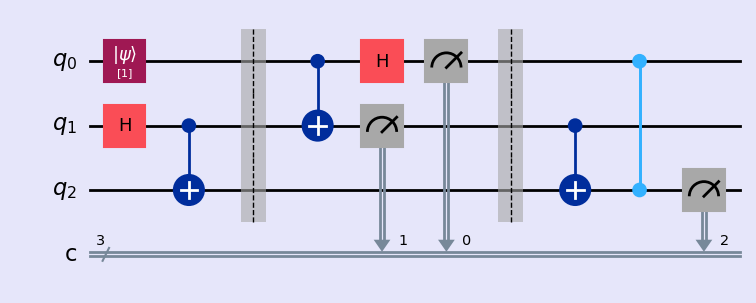

In [2]:

# teleport
def teleport(vec: Statevector):
    qc = QuantumCircuit(3,3)
    # init_gate = Initialize(vec)
    # qc.append(init_gate,[0])
    # create shared entangled pair (Phi +) for qubit 1,2
    qc.initialize(1,0)
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()

    # Bell decoding for qubit 0,1 
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])
    qc.barrier()

    qc.cx(1,2)
    qc.cz(0,2)

    # disentangler = init_gate.gates_to_uncompute()
    # qc.append(disentangler,[2])

    qc.measure(2,2)


    return qc

vec = random_statevector(2)
circuit_teleport = teleport(vec)
style = {'backgroundcolor': 'lavender'}
circuit_teleport.draw(output='mpl', style = style)

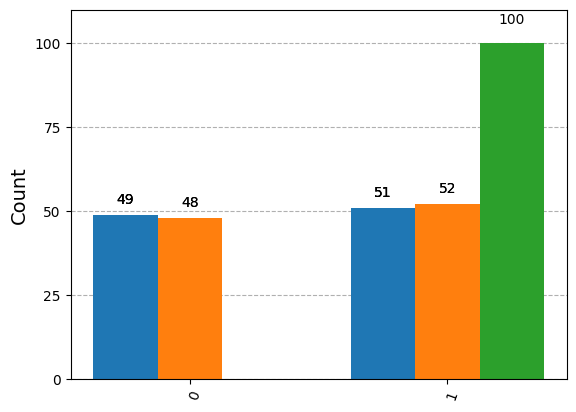

In [3]:
teleport_backend = StatevectorSimulator()
t_qc = transpile(circuit_teleport, teleport_backend)
counts = teleport_backend.run(t_qc,shots=100).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

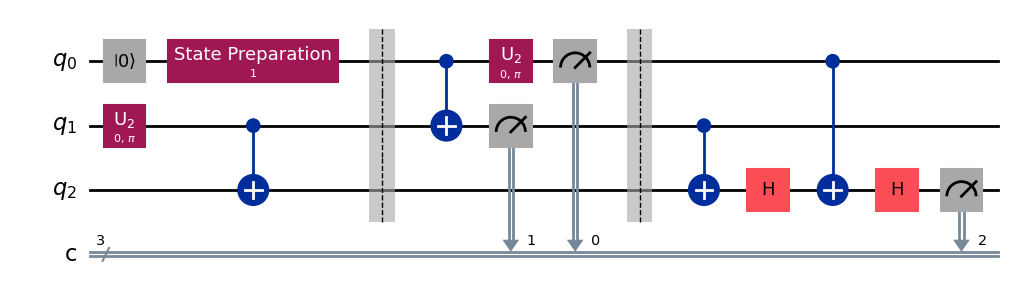

In [4]:
circuit_teleport.decompose().draw(output='mpl')